https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

# **SETUP**

In [1]:
from google.colab import drive
import pandas as pd
import os
drive.mount('/content/drive')
os.chdir( 'drive/My Drive/Colab Notebooks' )
df = pd.read_csv('vehicles.csv')
print( df.shape )

Mounted at /content/drive
(426880, 26)


In [2]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [3]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


# **HANDLING NULLS**

I have to understand how many missing values I am dealing with in this data set, and then consider removing ones that have a majority of values as N/A.

In [4]:
import numpy as np
#Get the number of missing data points per column
#Find the percentage of each column that is a null value.

missing_values_count = df.isnull().sum()
missing_values_count[0::]

missing_value_percentage = (missing_values_count / len(df)) * 100
missing_value_percentage[0::]

,0
id,0.000000
url,0.000000
region,0.000000
region_url,0.000000
price,0.000000
year,0.282281
manufacturer,4.133714
model,1.236179
condition,40.785232
cylinders,41.622470


Figure out total cells missing now. Will compare this with what it is after I do my deletion of null values.

The documentation for the County column, which is 100 nulls is "useless column left in by mistake". I will delete this and now check how much of our dataframe is still null.

In [5]:
county_dropped = df.drop('county', axis=1)

In [6]:
county_dropped.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

In [7]:
import numpy as np
#Get the number of missing data points per column
#Find the percentage of each column that is a null value.

missing_values_count = county_dropped.isnull().sum()
missing_values_count[0::]

missing_value_percentage = (missing_values_count / len(county_dropped)) * 100
missing_value_percentage[0::]

,0
id,0.000000
url,0.000000
region,0.000000
region_url,0.000000
price,0.000000
year,0.282281
manufacturer,4.133714
model,1.236179
condition,40.785232
cylinders,41.622470


In [8]:
total_cells = np.product(county_dropped.shape)
total_missing = missing_values_count.sum()

total_percent_missing = (total_missing/total_cells) * 100
print(total_percent_missing)

11.511019490254872


Pretty good progress, we cut our N/A values by about 3%. The next greatest row with missing values is size. I will check that next.

Documentation for column size says "size of vehicle"

I am deciding to drop the size column and this is my reasoning. At first, I thought maybe I should keep it because with it we can interpret what types of cars people are selling on the site. However, with 71% of entries missing, it is probably because Craigslist people skip the optional field, which isn't surprising because, well...craigslist. Additionally, filling in the N/A with a value like 'Unknown would add literally zero to the data interpretation.

In [9]:
second_drop = county_dropped.drop('size', axis=1)

In [10]:
second_drop.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'type', 'paint_color', 'image_url',
       'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

In [11]:
missing_values_count = second_drop.isnull().sum()
missing_values_count[0::]

missing_value_percentage = (missing_values_count / len(second_drop)) * 100
missing_value_percentage[0::]

,0
id,0.000000
url,0.000000
region,0.000000
region_url,0.000000
price,0.000000
year,0.282281
manufacturer,4.133714
model,1.236179
condition,40.785232
cylinders,41.622470


In [12]:
total_cells = np.product(second_drop.shape)
total_missing = missing_values_count.sum()

total_percent_missing = (total_missing/total_cells) * 100
print(total_percent_missing)

9.000333817466268


Huge progress made with cutting size out. Now I am going to check out Cylinders.

In [13]:
second_drop['cylinders']

,cylinders
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
426875,6 cylinders
426876,NaN
426877,NaN
426878,6 cylinders


In my view, if 'cylinders' is missing data, it is because the data was not inputed, rather than it not existing. Every single car has cylinders, so I can't say '0' cylinders. Since the data type appears to be categorical given the string nature of inputs like '6 cylinders', I will make NaN values marked as 'Unknown'.

In [14]:
second_drop['cylinders']

,cylinders
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
426875,6 cylinders
426876,NaN
426877,NaN
426878,6 cylinders


In [15]:
second_drop['cylinders'] = second_drop['cylinders'].fillna('Unknown')

In [16]:
second_drop['cylinders']

,cylinders
0,Unknown
1,Unknown
2,Unknown
3,Unknown
4,Unknown
...,...
426875,6 cylinders
426876,Unknown
426877,Unknown
426878,6 cylinders


In [17]:
missing_values_count = second_drop.isnull().sum()
missing_values_count[0::]

missing_value_percentage = (missing_values_count / len(second_drop)) * 100
missing_value_percentage[0::]

total_cells = np.product(second_drop.shape)
total_missing = missing_values_count.sum()

total_percent_missing = (total_missing/total_cells) * 100
print(total_percent_missing)

7.266064233508246


In [18]:
missing_values_count

,0
id,0
url,0
region,0
region_url,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,0


Down to 7.2% of values missing. Going to tackle condition next. Condition documentation : "Condition of Vehicle". Condition exists, so the 42% that are null simply weren't recorded. At first, I thought that condition can be inferred from the age of the vehicle. If the vehicle was made in 1999, it's condition can be inferred to be worse than a vehicle made in 2020. But, after playing devil's advocate, it is possible that the older car is an antique that was never driven and thus may be in better condition than a car from 2020 that is defected/had an accident. So, I am going to do the same method from last time, replace NaN value with 'Unknown'. I use the same logic for the fields 'paint_color', 'drive', 'VIN', and 'type'for now. The reasoning is that all of these are fields that are categorical(cannot be quantified). Additionally, filling in values for them like '0' or the next row after don't make sense.

In [19]:
second_drop['condition'] = second_drop['condition'].fillna('Unknown')
second_drop['paint_color'] = second_drop['paint_color'].fillna('Unknown')
second_drop['drive'] = second_drop['drive'].fillna('Unknown')
second_drop['VIN'] = second_drop['VIN'].fillna('Unknown')
second_drop['type'] = second_drop['type'].fillna('Unknown')


missing_values_count = second_drop.isnull().sum()
missing_values_count[0::]

missing_value_percentage = (missing_values_count / len(second_drop)) * 100
missing_value_percentage[0::]

total_cells = np.product(second_drop.shape)
total_missing = missing_values_count.sum()

total_percent_missing = (total_missing/total_cells) * 100
print(total_percent_missing)

0.5431171133183408


I like to see under 1% NaN now.

In [20]:
second_drop.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,VIN,drive,type,paint_color,image_url,description,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,NaN,NaN,nc,NaN,NaN,NaN


In [21]:
second_drop

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,VIN,drive,type,paint_color,image_url,description,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,1N4AA6AV6KC367801,fwd,sedan,Unknown,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,Unknown,...,7JR102FKXLG042696,fwd,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,Unknown,...,1GYFZFR46LF088296,Unknown,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,58ABK1GG4JU103853,fwd,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [22]:
missing_value_percentage[0::]

,0
id,0.000000
url,0.000000
region,0.000000
region_url,0.000000
price,0.000000
year,0.282281
manufacturer,4.133714
model,1.236179
condition,0.000000
cylinders,0.000000


For the time being, I think I am ready to begin with other parts of the data cleaning, and stop the handling of Null values. We have <1% of NaN values. Additionally, the largest NaN value remaining is 'manufacturer', who should be canceled by the 'model' have significantly less missing.

# **OUTLIER REMOVAL**

In [23]:
def detect_outliers(df, field):
  q1 = df[field].quantile(0.25)
  q3 = df[field].quantile(0.75)
  iqr = q3 - q1

  lower_threshold = q1 - (1.5 * iqr)
  upper_threshold = q3 + (1.5 * iqr)

  return df[(df[field] < lower_threshold) | (df[field] > upper_threshold)]


detect_outliers(second_drop, 'year')

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,VIN,drive,type,paint_color,image_url,description,state,lat,long,posting_date
37,7316130053,https://auburn.craigslist.org/cto/d/opelika-19...,auburn,https://auburn.craigslist.org,4500,1992.0,jeep,cherokee,excellent,6 cylinders,...,Unknown,4wd,Unknown,Unknown,https://images.craigslist.org/01010_7EM2aot64G...,192k miles brand new TSLs 4x4 jeep xj. 4x4 wor...,al,32.645400,-85.378300,2021-05-03T07:38:05-0500
101,7309160821,https://auburn.craigslist.org/cto/d/wanted-vol...,auburn,https://auburn.craigslist.org,12990,1968.0,volvo,NaN,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,https://images.craigslist.org/00b0b_55DC13BpVq...,Looking to find a good Volvo 1800S or 1800ES w...,al,32.645400,-85.378300,2021-04-19T07:46:40-0500
137,7305082143,https://auburn.craigslist.org/cto/d/tuskegee-i...,auburn,https://auburn.craigslist.org,2500,1966.0,NaN,1966 C-30 1 ton,good,6 cylinders,...,Unknown,rwd,pickup,brown,https://images.craigslist.org/00k0k_fmcpYCNBUG...,Great Chevy Barn Find Great candidate for res...,al,32.416900,-85.709400,2021-04-11T07:07:52-0500
208,7316644188,https://bham.craigslist.org/cto/d/birmingham-1...,birmingham,https://bham.craigslist.org,2500,1976.0,chevrolet,malibu classic,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,https://images.craigslist.org/00B0B_NcrT4hLRRd...,Car is complete with a 350 V8. A/C and automat...,al,33.517900,-86.837200,2021-05-04T07:11:30-0500
210,7316643810,https://bham.craigslist.org/cto/d/birmingham-1...,birmingham,https://bham.craigslist.org,1300,1969.0,mercedes-benz,benz,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,https://images.craigslist.org/00T0T_KljAvpSDdb...,Car has been sitting and everything is still o...,al,33.521000,-86.806600,2021-05-04T07:10:04-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426729,7304935237,https://wyoming.craigslist.org/cto/d/powell-vi...,wyoming,https://wyoming.craigslist.org,20000,1951.0,jeep,cj 3a willys,like new,4 cylinders,...,Unknown,4wd,other,red,https://images.craigslist.org/00Y0Y_fs4oWeuOJv...,"OFFERING, A BEAUTIFUL OLDER BODY OFF RESTORATI...",wy,44.523100,-109.075600,2021-04-10T16:31:26-0600
426762,7303456231,https://wyoming.craigslist.org/cto/d/laramie-1...,wyoming,https://wyoming.craigslist.org,7000,1982.0,mazda,rx& gls sport,excellent,other,...,Unknown,rwd,coupe,brown,https://images.craigslist.org/00F0F_iL9qc50t8S...,1982 Mazda RX7 GLS Sport in excellent conditio...,wy,41.310837,-105.590733,2021-04-07T19:21:02-0600
426809,7302963273,https://wyoming.craigslist.org/cto/d/jackson-1...,wyoming,https://wyoming.craigslist.org,18000,1990.0,jeep,gand wagoneer,good,8 cylinders,...,Unknown,4wd,SUV,black,https://images.craigslist.org/00g0g_iKspzwitCl...,Patina Survivor... RARE Original condition. ...,wy,43.452800,-110.739300,2021-04-06T21:02:26-0600
426831,7302384818,https://wyoming.craigslist.org/cto/d/cheyenne-...,wyoming,https://wyoming.craigslist.org,9800,1985.0,nissan,300zx coupe with t-tops,like new,6 cylinders,...,Unknown,rwd,hatchback,red,https://images.craigslist.org/00h0h_hGbhVx97PY...,"All original 1985 300zx, it’s a Automatic 3000...",wy,41.143700,-104.796200,2021-04-05T18:10:52-0600


In [24]:
print(second_drop['year'].describe().apply(lambda x: format(x, 'f')))

count    425675.000000
mean       2011.235191
std           9.452120
min        1900.000000
25%        2008.000000
50%        2013.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: object


In [25]:
def remove_outliers(df, field):
  print(f'Rows before removing outliers for {field}: {len(df)}')
  print(f'Removing...')
  #Call detect_outliers to get our subset
  outliers = detect_outliers(df, field)
  outlier_indices = outliers.index
  #Drop outliers
  df.drop(outlier_indices, inplace=True)
  print(f'Rows after removing outliers for {field}: {len(df)}')

In [26]:
remove_outliers(second_drop, 'year')

Rows before removing outliers for year: 426880
Removing...
Rows after removing outliers for year: 410984


In [27]:
426880 - 410984

15896

Our change in rows '15896' matches the detect_outliers output for 'year' that we called earlier, proving that this is working to remove outliers.

In [28]:
print(second_drop['year'].describe().apply(lambda x: format(x, 'f')))

count    409779.000000
mean       2012.636475
std           5.465262
min        1995.000000
25%        2009.000000
50%        2014.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: object


Our min and mean make a lot more sense now, and our standard deviation went down a lot.

Time to move to removing outliers for 'price'

In [29]:
print(second_drop['price'].describe().apply(lambda x: format(x, 'f')))

count        410984.000000
mean          68376.823901
std        12019560.997380
min               0.000000
25%            5988.000000
50%           13995.000000
75%           26850.000000
max      3736928711.000000
Name: price, dtype: object


Not sure who sold a car for 3.7 billion dollars but they gotta get out of our dataset.

In [30]:
detect_outliers(second_drop, 'price')

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,VIN,drive,type,paint_color,image_url,description,state,lat,long,posting_date
204,7316691442,https://bham.craigslist.org/ctd/d/tuscaloosa-2...,birmingham,https://bham.craigslist.org,58977,2019.0,gmc,sierra 3500,Unknown,Unknown,...,1GT42WEY6KF184860,4wd,Unknown,white,https://images.craigslist.org/01717_6QaVsXDoRu...,Contemporary Automotive address: 3427 Skyla...,al,33.168322,-87.491902,2021-05-04T09:11:35-0500
346,7315259946,https://bham.craigslist.org/ctd/d/cleveland-20...,birmingham,https://bham.craigslist.org,98900,2001.0,ferrari,360 modena,good,8 cylinders,...,ZFFYT53A110125703,rwd,convertible,red,https://images.craigslist.org/00x0x_L3jIoWpkvY...,"2001 Ferrari 360 Modena Spider - $98,900 Year:...",al,34.586557,-83.761243,2021-05-01T08:48:02-0500
365,7314956487,https://bham.craigslist.org/ctd/d/springville-...,birmingham,https://bham.craigslist.org,72900,2021.0,chevrolet,tahoe,good,8 cylinders,...,1GNSKPKD7MR102321,4wd,SUV,grey,https://images.craigslist.org/00q0q_aaAJe1ws3d...,"2021 Chevrolet Tahoe 1500 Z71 - $72,900 Year:...",al,33.772519,-86.475191,2021-04-30T14:07:10-0500
461,7314044610,https://bham.craigslist.org/ctd/d/richmond-202...,birmingham,https://bham.craigslist.org,99950,2021.0,chevrolet,corvette stingray spor,Unknown,Unknown,...,Unknown,rwd,coupe,orange,https://images.craigslist.org/00T0T_grWgd5g10R...,2021 Chevrolet Corvette Stingray Sports Car Tw...,al,37.401100,-77.461500,2021-04-28T16:12:26-0500
807,7311384779,https://bham.craigslist.org/ctd/d/south-amboy-...,birmingham,https://bham.craigslist.org,63990,2017.0,NaN,Freightliner M2 106 Medium Duty,good,6 cylinders,...,3ALACWDTXHDJG7052,rwd,truck,white,https://images.craigslist.org/00v0v_1ZMx374UaY...,2017 Freightliner M2 106 Medium Duty 24 FOOT B...,al,40.468785,-74.281707,2021-04-23T11:04:44-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426694,7305641060,https://wyoming.craigslist.org/ctd/d/gilberts-...,wyoming,https://wyoming.craigslist.org,59900,2014.0,ford,f550 xl,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,https://images.craigslist.org/00x0x_httQ0BwNkq...,**FOR SALE** 2014 Ford F550 Super Duty 45' Al...,wy,42.117529,-88.436611,2021-04-12T09:35:09-0600
426716,7305433671,https://wyoming.craigslist.org/ctd/d/fort-mead...,wyoming,https://wyoming.craigslist.org,65950,2020.0,ford,f450,like new,8 cylinders,...,Unknown,4wd,truck,blue,https://images.craigslist.org/00D0D_ce3Fc2lKqv...,Here is a 2020 Ford Superduty F-450 Crew Cab X...,wy,44.415366,-103.522882,2021-04-11T18:46:14-0600
426778,7303328806,https://wyoming.craigslist.org/ctd/d/saddlestr...,wyoming,https://wyoming.craigslist.org,65995,2020.0,gmc,sierra,good,8 cylinders,...,1GT49TEY0LF185272,4wd,truck,white,https://images.craigslist.org/00c0c_8s1jscDE0U...,"2020 GMC Sierra 3500 SLE - $65,995 Year: 2020...",wy,44.354923,-106.680384,2021-04-07T14:42:53-0600
426810,7302916705,https://wyoming.craigslist.org/ctd/d/american-...,wyoming,https://wyoming.craigslist.org,58995,2017.0,gmc,sierra 2500hd,Unknown,8 cylinders,...,1GT12UEYXHF124158,4wd,Unknown,black,https://images.craigslist.org/00U0U_cti94a34Ix...,2017 GMC_ Sierra 2500HD_ Denali L5P 4x4 ...,wy,40.376357,-111.806112,2021-04-06T18:34:18-0600


In [31]:
cars_60k_100k = len(second_drop[(second_drop['price'] > 60000) & (second_drop['price'] < 100000)])
cars_60k_100k

5333

Something tells me to keep these cars that are between 60 and 100k, since these could actually be genuine higher priced cars. I will modify my methods from before and make one specifically for the price field, and insert my own upper_threshold of 100000

In [32]:
def price_detect_outliers(df, field):
  q1 = df[field].quantile(0.25)
  q3 = df[field].quantile(0.75)
  iqr = q3 - q1

  lower_threshold = q1 - (1.5 * iqr)
  upper_threshold = 100000

  return df[(df[field] < lower_threshold) | (df[field] > upper_threshold)]


price_detect_outliers(second_drop, 'price')

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,VIN,drive,type,paint_color,image_url,description,state,lat,long,posting_date
1727,7302443955,https://bham.craigslist.org/cto/d/trussville-2...,birmingham,https://bham.craigslist.org,130000,2019.0,chevrolet,corvette,like new,8 cylinders,...,Unknown,rwd,coupe,blue,https://images.craigslist.org/00i0i_hXysWO79nV...,Z06 Customized Super Charged Corvette! Year: 2...,al,33.633900,-86.598100,2021-04-05T22:11:19-0500
2922,7313297746,https://huntsville.craigslist.org/cto/d/grant-...,huntsville / decatur,https://huntsville.craigslist.org,140000,2015.0,jeep,renegade,like new,6 cylinders,...,Unknown,fwd,SUV,yellow,https://images.craigslist.org/00909_evfUq96WMy...,This vehicle is still financed through whole s...,al,34.495900,-86.259000,2021-04-27T09:21:39-0500
4797,7302285034,https://montgomery.craigslist.org/ctd/d/portla...,montgomery,https://montgomery.craigslist.org,104000,2018.0,dodge,NaN,Unknown,8 cylinders,...,2C3CDZH95JH100203,fwd,other,Unknown,https://images.craigslist.org/00000_bCahx46v88...,2018 *** Dodge Challenger SRT Demon*** ...,al,45.494265,-122.579192,2021-04-05T15:50:38-0500
4826,7316436488,https://tuscaloosa.craigslist.org/cto/d/tuscal...,tuscaloosa,https://tuscaloosa.craigslist.org,104900,2020.0,bmw,m805i,excellent,8 cylinders,...,WBAGV8C04LBP48895,4wd,sedan,black,https://images.craigslist.org/00Y0Y_32p92xzxBt...,!!!SUPER FAST IMMACULATE CAR!!! 523 hp! ***LOA...,al,33.334119,-87.470436,2021-05-03T16:16:01-0500
5003,7316732292,https://anchorage.craigslist.org/cto/d/ward-co...,anchorage / mat-su,https://anchorage.craigslist.org,145000,2014.0,NaN,freightliner m2 106,like new,6 cylinders,...,Unknown,4wd,truck,black,https://images.craigslist.org/00B0B_2Z6592a9LB...,"2014 Freightliner M2 106 4X4 17,094.5 Miles Cu...",ak,55.372000,-131.683200,2021-05-04T07:22:32-0800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417324,7313557179,https://greenbay.craigslist.org/ctd/d/salem-20...,green bay,https://greenbay.craigslist.org,122420,2017.0,audi,NaN,Unknown,10 cylinders,...,WUAKBAFX4H7904534,fwd,other,Unknown,https://images.craigslist.org/01313_hCMwohlGn4...,2017 *** Audi R8 V10 Plus*** Pres...,wi,44.927304,-123.030322,2021-04-27T16:36:38-0500
419656,7317021019,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,119900,2021.0,chevrolet,corvette,good,8 cylinders,...,1G1YC2D49M5106953,rwd,coupe,red,https://images.craigslist.org/00u0u_70wb72g0xD...,2021 Chevrolet Corvette 2dr Stingray Cpe w/3LT...,wi,43.029559,-89.397796,2021-05-04T18:47:19-0500
419756,7316648420,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,119995,2004.0,acura,nsx,Unknown,6 cylinders,...,JH4NA21614T000075,rwd,coupe,black,https://images.craigslist.org/00F0F_eQpU68RrA0...,2004 Acura NSX NSX-TABSOLUTELY STUNNING !!L...,wi,43.063100,-89.313300,2021-05-04T07:26:45-0500
420693,7311450715,https://madison.craigslist.org/cto/d/madison-2...,madison,https://madison.craigslist.org,125000,2014.0,porsche,911 turbo s,excellent,6 cylinders,...,WP0AD2A93ES167417,4wd,coupe,black,https://images.craigslist.org/00i0i_1pKGoWahGi...,10k miles awd obsidian black always serviced a...,wi,43.037200,-89.397100,2021-04-23T12:43:37-0500


In [33]:
def remove_outliers(df, field):
  print(f'Rows before removing outliers for {field}: {len(df)}')
  print(f'Removing...')
  #Call detect_outliers to get our subset
  outliers = price_detect_outliers(df, field)
  outlier_indices = outliers.index
  #Drop outliers
  df.drop(outlier_indices, inplace=True)
  print(f'Rows after removing outliers for {field}: {len(df)}')

In [34]:
remove_outliers(second_drop, 'price')

Rows before removing outliers for price: 410984
Removing...
Rows after removing outliers for price: 410411


In [35]:
len(second_drop)

410411

In [36]:
print(second_drop['price'].describe().apply(lambda x: format(x, 'f')))

count    410411.000000
mean      17417.192751
std       14834.989812
min           0.000000
25%        5980.000000
50%       13995.000000
75%       26590.000000
max      100000.000000
Name: price, dtype: object


I like this a lot more. I see the propsect of people giving away cars for free, and by hardcoding my max to 100k, i keep realistic luxury cars being sold, but now without the 3.7 billion dollar sale, everything else makes more sense

In [37]:
cars_0_dollar = len(second_drop[second_drop['price'] == 0]) # Changed () to [] to filter the DataFrame instead of calling it as a function.
cars_0_dollar

32592

In [38]:
cars_1_1k = len(second_drop[(second_drop['price'] > 1) & (second_drop['price'] < 1000)])
cars_1_1k

11061

I'm gonna be honest, the 32,000 cars being sold for 0 took me for a spin, to the point where it almost changed my world view. But, I guess that is the Craiglist Charm. But, since it is so much data, and considering that the count of cars between 1-1000 is so high, I think I will actually remove the $0 car listings. I simply can't trust that all 32000 are the "take my junker!" craiglist listing.

In [39]:
second_drop = second_drop[second_drop['price'] > 0]
print(f'New rows: {len(second_drop)}')
print(second_drop['price'].describe().apply(lambda x: format(x, 'f')))

New rows: 377819
count    377819.000000
mean      18919.661250
std       14513.280626
min           1.000000
25%        7495.000000
50%       15590.000000
75%       27988.000000
max      100000.000000
Name: price, dtype: object


The last field I will check is odometer.

In [40]:
print(second_drop['odometer'].describe().apply(lambda x: format(x, 'f')))

count      375560.000000
mean        96453.323530
std        146626.534290
min             0.000000
25%         38321.000000
50%         87622.500000
75%        136000.000000
max      10000000.000000
Name: odometer, dtype: object


We got a range from 0 miles(new) to 10 MILLION MILES?! That's gotta be Japanese made if its real

In [41]:
detect_outliers(second_drop, 'odometer')

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,VIN,drive,type,paint_color,image_url,description,state,lat,long,posting_date
484,7313889508,https://bham.craigslist.org/ctd/d/siluria-2008...,birmingham,https://bham.craigslist.org,11500,2008.0,ford,f-250 super duty xl,good,8 cylinders,...,1FTSX20R48EC34753,rwd,pickup,white,https://images.craigslist.org/00101_lRU2LEdZHq...,2008 Ford F-250 Super Duty XL ; Automatic ; 6....,al,33.242941,-86.817291,2021-04-28T11:50:08-0500
527,7313736542,https://bham.craigslist.org/cto/d/leeds-73-die...,birmingham,https://bham.craigslist.org,5500,2001.0,ford,e350 van,fair,Unknown,...,Unknown,fwd,van,white,https://images.craigslist.org/00P0P_4rjKmrp1sj...,Work van. 7.3 diesel 340k miles. Good conditio...,al,33.528300,-86.574800,2021-04-28T06:11:19-0500
562,7313478091,https://bham.craigslist.org/ctd/d/cullman-2014...,birmingham,https://bham.craigslist.org,27990,2014.0,ram,2500 4x4,like new,6 cylinders,...,Unknown,4wd,truck,white,https://images.craigslist.org/00I0I_hzTtGkgzeh...,SPECIAL OF THE WEEK!! RAM 2500 4x4 CUMMINS H.O...,al,34.188155,-86.851389,2021-04-27T14:14:34-0500
616,7312876423,https://bham.craigslist.org/ctd/d/cullman-2018...,birmingham,https://bham.craigslist.org,17990,2018.0,ford,edge sel,like new,6 cylinders,...,Unknown,fwd,SUV,blue,https://images.craigslist.org/00K0K_jKDV37d66b...,SELLING THIS EXTREMLY NICE EDGE LOADED WITH LE...,al,34.188155,-86.851389,2021-04-26T11:57:28-0500
932,7310629921,https://bham.craigslist.org/cto/d/saginaw-lexu...,birmingham,https://bham.craigslist.org,2900,1999.0,lexus,gs400,good,8 cylinders,...,Unknown,Unknown,sedan,white,https://images.craigslist.org/00V0V_gH4tUM1kYI...,Great 1999 Lexus GS400. Car had 25k miles whe...,al,33.193400,-86.794400,2021-04-21T18:49:15-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426508,7310981911,https://wyoming.craigslist.org/ctd/d/billings-...,wyoming,https://wyoming.craigslist.org,4995,2002.0,ford,e450,Unknown,10 cylinders,...,Unknown,rwd,Unknown,Unknown,https://images.craigslist.org/00N0N_7tq8IBsGpt...,AM/FM/CD Vinyl Flooring Leather seats V10 (6.8...,wy,45.614034,-108.386684,2021-04-22T12:54:25-0600
426590,7308082716,https://wyoming.craigslist.org/ctd/d/evans-200...,wyoming,https://wyoming.craigslist.org,14500,2005.0,ram,NaN,Unknown,Unknown,...,3D7LS38C25G797769,4wd,pickup,silver,https://images.craigslist.org/00u0u_k9EjB8LWOQ...,2005 Dodge Ram 3500 Crew Cab 4WD Offered b...,wy,40.374375,-104.694103,2021-04-16T20:51:08-0600
426643,7307059015,https://wyoming.craigslist.org/cto/d/worland-2...,wyoming,https://wyoming.craigslist.org,4200,2001.0,toyota,sequoia,fair,8 cylinders,...,Unknown,4wd,SUV,white,https://images.craigslist.org/00c0c_eHz36twBhn...,2001 Sequoia for sale. She's getting up there ...,wy,43.904400,-108.061000,2021-04-14T23:23:46-0600
426671,7306463286,https://wyoming.craigslist.org/ctd/d/osage-200...,wyoming,https://wyoming.craigslist.org,9900,2005.0,chevrolet,2500 ls,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,https://images.craigslist.org/01111_gkuhJJAgsq...,2005 CHEVY 2500 LS EXT CAB LONG BOX 4X4 DIESEL...,wy,43.850927,-104.227491,2021-04-13T18:11:15-0600


I am going to again make a method just for odometer, because I want to keep new cars but I don't want to have any cars with more than 500,000 miles because that is super rare.

In [42]:
def odometer_detect_outliers(df, field):
  q1 = df[field].quantile(0.25)
  q3 = df[field].quantile(0.75)
  iqr = q3 - q1

  lower_threshold = q1 - (1.5 * iqr)
  upper_threshold = 500000

  return df[(df[field] < lower_threshold) | (df[field] > upper_threshold)]


odometer_detect_outliers(second_drop, 'odometer')

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,VIN,drive,type,paint_color,image_url,description,state,lat,long,posting_date
562,7313478091,https://bham.craigslist.org/ctd/d/cullman-2014...,birmingham,https://bham.craigslist.org,27990,2014.0,ram,2500 4x4,like new,6 cylinders,...,Unknown,4wd,truck,white,https://images.craigslist.org/00I0I_hzTtGkgzeh...,SPECIAL OF THE WEEK!! RAM 2500 4x4 CUMMINS H.O...,al,34.188155,-86.851389,2021-04-27T14:14:34-0500
616,7312876423,https://bham.craigslist.org/ctd/d/cullman-2018...,birmingham,https://bham.craigslist.org,17990,2018.0,ford,edge sel,like new,6 cylinders,...,Unknown,fwd,SUV,blue,https://images.craigslist.org/00K0K_jKDV37d66b...,SELLING THIS EXTREMLY NICE EDGE LOADED WITH LE...,al,34.188155,-86.851389,2021-04-26T11:57:28-0500
1440,7305220570,https://bham.craigslist.org/cto/d/trussville-2...,birmingham,https://bham.craigslist.org,15000,2003.0,volvo,vnl 780,good,Unknown,...,Unknown,Unknown,truck,white,https://images.craigslist.org/00R0R_gVTddwsVao...,2003 Volvo Semi Truck 780 For Sale. Very nice ...,al,33.633900,-86.598100,2021-04-11T12:21:07-0500
1536,7304161888,https://bham.craigslist.org/ctd/d/cullman-sing...,birmingham,https://bham.craigslist.org,14900,2005.0,NaN,KW T800,Unknown,Unknown,...,Unknown,Unknown,Unknown,white,https://images.craigslist.org/00O0O_7qASRuAop2...,"2005 KW T800 single axle day cabs, Cummins ISX...",al,34.209800,-86.752000,2021-04-09T10:16:20-0500
1729,7302443351,https://bham.craigslist.org/cto/d/trussville-2...,birmingham,https://bham.craigslist.org,15000,2003.0,volvo,vnl 780,good,Unknown,...,Unknown,Unknown,truck,white,https://images.craigslist.org/00R0R_gVTddwsVao...,2003 Volvo Semi Truck 780 For Sale. Very nice ...,al,33.633900,-86.598100,2021-04-05T22:08:49-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423091,7314368209,https://milwaukee.craigslist.org/cto/d/waterfo...,milwaukee,https://milwaukee.craigslist.org,250,2022.0,NaN,trailer,fair,Unknown,...,Unknown,Unknown,Unknown,Unknown,https://images.craigslist.org/00Y0Y_3AeJN6UYkh...,#1- It has always served me well for light wak...,wi,42.763200,-88.197400,2021-04-29T11:34:59-0500
423341,7313391230,https://milwaukee.craigslist.org/cto/d/milwauk...,milwaukee,https://milwaukee.craigslist.org,82000,2017.0,NaN,Kenworth T680,good,Unknown,...,Unknown,Unknown,truck,black,https://images.craigslist.org/00606_h8j3lSS3t7...,This listing is for a complete ready to go to ...,wi,43.032761,-87.958603,2021-04-27T11:56:20-0500
423872,7311490756,https://milwaukee.craigslist.org/ctd/d/caledon...,milwaukee,https://milwaukee.craigslist.org,79000,2015.0,NaN,peterbilt 389,good,Unknown,...,1XPXD49X6FD277682,Unknown,Unknown,purple,https://images.craigslist.org/00l0l_7rH1zTSDku...,"2015 PETERBILT 389, CUMMINS ISX 15 500 HP SLEE...",wi,42.829500,-87.922800,2021-04-23T13:45:18-0500
424165,7310638598,https://milwaukee.craigslist.org/cto/d/milwauk...,milwaukee,https://milwaukee.craigslist.org,19500,2010.0,NaN,freightliner cascadia sleeper,Unknown,Unknown,...,Unknown,Unknown,Unknown,white,https://images.craigslist.org/00S0S_3fv1aARwaE...,2010 Freightliner Cascadia · Truck · Driven 90...,wi,42.954900,-87.944700,2021-04-21T19:11:07-0500


In [43]:
def odometer_remove_outliers(df, field):
  print(f'Rows before removing outliers for {field}: {len(df)}')
  print(f'Removing...')
  #Call detect_outliers to get our subset
  outliers = odometer_detect_outliers(df, field)
  outlier_indices = outliers.index
  #Drop outliers
  df.drop(outlier_indices, inplace=True)
  print(f'Rows after removing outliers for {field}: {len(df)}')

In [44]:
cars_0_mi = len(second_drop[second_drop['odometer'] == 0]) # Changed () to [] to filter the DataFrame instead of calling it as a function.
cars_0_mi

891

In [45]:
odometer_detect_outliers(second_drop, 'odometer')

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,VIN,drive,type,paint_color,image_url,description,state,lat,long,posting_date
562,7313478091,https://bham.craigslist.org/ctd/d/cullman-2014...,birmingham,https://bham.craigslist.org,27990,2014.0,ram,2500 4x4,like new,6 cylinders,...,Unknown,4wd,truck,white,https://images.craigslist.org/00I0I_hzTtGkgzeh...,SPECIAL OF THE WEEK!! RAM 2500 4x4 CUMMINS H.O...,al,34.188155,-86.851389,2021-04-27T14:14:34-0500
616,7312876423,https://bham.craigslist.org/ctd/d/cullman-2018...,birmingham,https://bham.craigslist.org,17990,2018.0,ford,edge sel,like new,6 cylinders,...,Unknown,fwd,SUV,blue,https://images.craigslist.org/00K0K_jKDV37d66b...,SELLING THIS EXTREMLY NICE EDGE LOADED WITH LE...,al,34.188155,-86.851389,2021-04-26T11:57:28-0500
1440,7305220570,https://bham.craigslist.org/cto/d/trussville-2...,birmingham,https://bham.craigslist.org,15000,2003.0,volvo,vnl 780,good,Unknown,...,Unknown,Unknown,truck,white,https://images.craigslist.org/00R0R_gVTddwsVao...,2003 Volvo Semi Truck 780 For Sale. Very nice ...,al,33.633900,-86.598100,2021-04-11T12:21:07-0500
1536,7304161888,https://bham.craigslist.org/ctd/d/cullman-sing...,birmingham,https://bham.craigslist.org,14900,2005.0,NaN,KW T800,Unknown,Unknown,...,Unknown,Unknown,Unknown,white,https://images.craigslist.org/00O0O_7qASRuAop2...,"2005 KW T800 single axle day cabs, Cummins ISX...",al,34.209800,-86.752000,2021-04-09T10:16:20-0500
1729,7302443351,https://bham.craigslist.org/cto/d/trussville-2...,birmingham,https://bham.craigslist.org,15000,2003.0,volvo,vnl 780,good,Unknown,...,Unknown,Unknown,truck,white,https://images.craigslist.org/00R0R_gVTddwsVao...,2003 Volvo Semi Truck 780 For Sale. Very nice ...,al,33.633900,-86.598100,2021-04-05T22:08:49-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423091,7314368209,https://milwaukee.craigslist.org/cto/d/waterfo...,milwaukee,https://milwaukee.craigslist.org,250,2022.0,NaN,trailer,fair,Unknown,...,Unknown,Unknown,Unknown,Unknown,https://images.craigslist.org/00Y0Y_3AeJN6UYkh...,#1- It has always served me well for light wak...,wi,42.763200,-88.197400,2021-04-29T11:34:59-0500
423341,7313391230,https://milwaukee.craigslist.org/cto/d/milwauk...,milwaukee,https://milwaukee.craigslist.org,82000,2017.0,NaN,Kenworth T680,good,Unknown,...,Unknown,Unknown,truck,black,https://images.craigslist.org/00606_h8j3lSS3t7...,This listing is for a complete ready to go to ...,wi,43.032761,-87.958603,2021-04-27T11:56:20-0500
423872,7311490756,https://milwaukee.craigslist.org/ctd/d/caledon...,milwaukee,https://milwaukee.craigslist.org,79000,2015.0,NaN,peterbilt 389,good,Unknown,...,1XPXD49X6FD277682,Unknown,Unknown,purple,https://images.craigslist.org/00l0l_7rH1zTSDku...,"2015 PETERBILT 389, CUMMINS ISX 15 500 HP SLEE...",wi,42.829500,-87.922800,2021-04-23T13:45:18-0500
424165,7310638598,https://milwaukee.craigslist.org/cto/d/milwauk...,milwaukee,https://milwaukee.craigslist.org,19500,2010.0,NaN,freightliner cascadia sleeper,Unknown,Unknown,...,Unknown,Unknown,Unknown,white,https://images.craigslist.org/00S0S_3fv1aARwaE...,2010 Freightliner Cascadia · Truck · Driven 90...,wi,42.954900,-87.944700,2021-04-21T19:11:07-0500


In [46]:
odometer_remove_outliers(second_drop, 'odometer')

Rows before removing outliers for odometer: 377819
Removing...
Rows after removing outliers for odometer: 376965


<ipython-input-43-787f8e7320d5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(outlier_indices, inplace=True)


In [47]:
print(second_drop['odometer'].describe().apply(lambda x: format(x, 'f')))

count    374706.000000
mean      92829.407597
std       63898.152062
min           0.000000
25%       38195.000000
50%       87346.000000
75%      135470.750000
max      500000.000000
Name: odometer, dtype: object


In [48]:
print('LAT')
print(second_drop['lat'].describe().apply(lambda x: format(x, 'f')))
print('---------------------------')
print('LONG')
print(second_drop['long'].describe().apply(lambda x: format(x, 'f')))

LAT
count    373520.000000
mean         38.522343
std           5.876307
min         -81.838232
25%          34.657800
50%          39.264400
75%          42.427600
max          82.252826
Name: lat, dtype: object
---------------------------
LONG
count    373520.000000
mean        -94.358294
std          18.194357
min        -159.827728
25%        -110.985500
50%         -87.979200
75%         -80.829894
max         173.885502
Name: long, dtype: object


In [49]:
print(f"Rows with long > 0: {len(second_drop[second_drop['long'] > 0])}")
print(f"Rows > -66: {len(second_drop[second_drop['long'] > -66])}")

Rows with long > 0: 21
Rows > -66: 31


I don't think Lat/Long is large enough to justify outliers.

In [50]:
len(second_drop)

376965

****

# **FEATURE CREATION**

Let's see what types of features we can create to make our data set more useful.

I'm gonna start with an obvious one first, age.

In [51]:
second_drop.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'type', 'paint_color', 'image_url',
       'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

In [52]:
from datetime import datetime

current_year = datetime.now().year
second_drop['age'] = current_year - second_drop['year']

<ipython-input-52-8b4b07fe2a93>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_drop['age'] = current_year - second_drop['year']


In [53]:
second_drop.tail()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,type,paint_color,image_url,description,state,lat,long,posting_date,age
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,fwd,sedan,Unknown,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600,6.0
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,Unknown,...,fwd,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600,5.0
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,Unknown,...,Unknown,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600,5.0
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,fwd,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600,7.0
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,Unknown,...,rwd,coupe,Unknown,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600,6.0


Next lets see what we are paying per mile driven using price and odometer.

In [54]:
second_drop['price_per_mile'] = second_drop['price'] / second_drop['odometer']

<ipython-input-54-b2212b58b240>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_drop['price_per_mile'] = second_drop['price'] / second_drop['odometer']


In [55]:
second_drop.tail()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,type,paint_color,image_url,description,state,lat,long,posting_date,age,price_per_mile
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,sedan,Unknown,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600,6.0,0.732018
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,Unknown,...,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600,5.0,2.543021
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,Unknown,...,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600,5.0,8.382846
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600,7.0,0.962739
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,Unknown,...,coupe,Unknown,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600,6.0,1.346628


Keeping with that theme, now I want to know how many miles this person was driving per year, to get an idea of what kind of maintenance might be required.

In [56]:
second_drop['miles_per_year'] = second_drop['odometer'] / second_drop['age']

<ipython-input-56-77d0a694caa2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_drop['miles_per_year'] = second_drop['odometer'] / second_drop['age']


In [57]:
columns_subset = ['age','odometer','miles_per_year']
second_drop[columns_subset].head(100)

,age,odometer,miles_per_year
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
103,6.0,14222.0,2370.333333
104,12.0,37888.0,3157.333333
105,6.0,9313.0,1552.166667
106,7.0,34636.0,4948.000000


# **FEATURE SELECTION**

Note of what we are looking for from the slides:

● Our data often has fields that arent useful for analysis or are redundant. Well want to get rid of those
● Examples could include
○ A primary key column
○ The price of an item and the sales tax paid on it
○ The age of a car and the year it was made
○ A url when using web scraped data


Things I notice in the dataset that are already matching some of the notes from the slides:

We have an id, url, region_url, year and my age column I created.

List of redundant fields that will not help with any type of analysis:
- id
- url
- region_url
- VIN
- image_url

I may come back and add more, but we'll start with this for now.
Additionally, I must note that I probably could have done this in a better order. I started with handling nulls because I was most familiar with that, but I see now why it would have been better to go off of the slides order.

In [58]:
second_drop.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'type', 'paint_color', 'image_url',
       'description', 'state', 'lat', 'long', 'posting_date', 'age',
       'price_per_mile', 'miles_per_year'],
      dtype='object')

In [59]:
len(second_drop)

376965

In [60]:
selection_subset = ['id', 'url', 'region_url', 'VIN', 'image_url']

In [61]:
second_drop.drop(selection_subset, axis=1, inplace=True)

<ipython-input-61-caa68db0d378>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_drop.drop(selection_subset, axis=1, inplace=True)


In [62]:
len(second_drop)

376965

In [63]:
second_drop.drop('year', axis=1, inplace=True)

<ipython-input-63-a38ca4c36aa1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_drop.drop('year', axis=1, inplace=True)


In [64]:
second_drop

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,...,type,paint_color,description,state,lat,long,posting_date,age,price_per_mile,miles_per_year
0,prescott,6000,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,...,Unknown,Unknown,NaN,az,NaN,NaN,NaN,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,...,Unknown,Unknown,NaN,ar,NaN,NaN,NaN,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,...,Unknown,Unknown,NaN,fl,NaN,NaN,NaN,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,...,Unknown,Unknown,NaN,ma,NaN,NaN,NaN,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,...,Unknown,Unknown,NaN,nc,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,...,sedan,Unknown,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600,6.0,0.732018,5371.000000
426876,wyoming,30590,volvo,s60 t5 momentum sedan 4d,good,Unknown,gas,12029.0,clean,other,...,sedan,red,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600,5.0,2.543021,2405.800000
426877,wyoming,34990,cadillac,xt4 sport suv 4d,good,Unknown,diesel,4174.0,clean,other,...,hatchback,white,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600,5.0,8.382846,834.800000
426878,wyoming,28990,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,...,sedan,silver,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600,7.0,0.962739,4301.714286


In [65]:
second_drop.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'description', 'state', 'lat', 'long', 'posting_date',
       'age', 'price_per_mile', 'miles_per_year'],
      dtype='object')

Logic checking my removals for keeping them or playing devils advocate.

-** Region : unneccessary because of state, lat, and long. Will remove**
- Price: Obvious.
- Manufacturer : maybe i wanna see the most popular/unpopular makes
- Model: debatable because of manufacturer presence, but i could envision subsets being made of just a specific manufacturer and then looking into the details. Will keep for now.
- Condition: important to see what kind of cars we are selling here
- Cylinders, transmission, drive, type : key factor of the car engine
- Fuel : vital
- Odometer: can be quite useful
- Title_status: could be interesting to track
- Paint color : for fun
- **Description : hard to analyze, will remove.**
- State, Lat, Long -> Give us geolocation data to track?
- Posting date: good for tracking time trends

Obviously will not delete the features I created.








In [66]:
second_drop.drop(['region', 'description'], axis=1, inplace=True)

<ipython-input-66-8568f54c2906>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_drop.drop(['region', 'description'], axis=1, inplace=True)


In [67]:
second_drop

,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date,age,price_per_mile,miles_per_year
0,6000,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,az,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,ar,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,fl,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,ma,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,nc,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,Unknown,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600,6.0,0.732018,5371.000000
426876,30590,volvo,s60 t5 momentum sedan 4d,good,Unknown,gas,12029.0,clean,other,fwd,sedan,red,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600,5.0,2.543021,2405.800000
426877,34990,cadillac,xt4 sport suv 4d,good,Unknown,diesel,4174.0,clean,other,Unknown,hatchback,white,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600,5.0,8.382846,834.800000
426878,28990,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600,7.0,0.962739,4301.714286


This looks good, will proceed with "some form of feature transformation".

# **FEATURE TRANSFORMATION**

In [68]:
second_drop

,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date,age,price_per_mile,miles_per_year
0,6000,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,az,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,ar,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,fl,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,ma,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,nc,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,Unknown,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600,6.0,0.732018,5371.000000
426876,30590,volvo,s60 t5 momentum sedan 4d,good,Unknown,gas,12029.0,clean,other,fwd,sedan,red,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600,5.0,2.543021,2405.800000
426877,34990,cadillac,xt4 sport suv 4d,good,Unknown,diesel,4174.0,clean,other,Unknown,hatchback,white,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600,5.0,8.382846,834.800000
426878,28990,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600,7.0,0.962739,4301.714286


I want to start with making 'title_status' binary. 1 means clean, 0 means other/null.

In [69]:
dummy = pd.get_dummies(second_drop['title_status'])
dummy.head()

,clean,lien,missing,parts only,rebuilt,salvage
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [70]:
df3 = pd.concat((second_drop, dummy), axis=1)

In [71]:
df3

,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,...,posting_date,age,price_per_mile,miles_per_year,clean,lien,missing,parts only,rebuilt,salvage
0,6000,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,Unknown,...,NaN,NaN,NaN,NaN,False,False,False,False,False,False
1,11900,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,Unknown,...,NaN,NaN,NaN,NaN,False,False,False,False,False,False
2,21000,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,Unknown,...,NaN,NaN,NaN,NaN,False,False,False,False,False,False
3,1500,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,Unknown,...,NaN,NaN,NaN,NaN,False,False,False,False,False,False
4,4900,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,Unknown,...,NaN,NaN,NaN,NaN,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,...,2021-04-04T03:21:31-0600,6.0,0.732018,5371.000000,True,False,False,False,False,False
426876,30590,volvo,s60 t5 momentum sedan 4d,good,Unknown,gas,12029.0,clean,other,fwd,...,2021-04-04T03:21:29-0600,5.0,2.543021,2405.800000,True,False,False,False,False,False
426877,34990,cadillac,xt4 sport suv 4d,good,Unknown,diesel,4174.0,clean,other,Unknown,...,2021-04-04T03:21:17-0600,5.0,8.382846,834.800000,True,False,False,False,False,False
426878,28990,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,...,2021-04-04T03:21:11-0600,7.0,0.962739,4301.714286,True,False,False,False,False,False


In [72]:
df3.drop(['title_status'], axis=1)

,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,...,posting_date,age,price_per_mile,miles_per_year,clean,lien,missing,parts only,rebuilt,salvage
0,6000,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,...,NaN,NaN,NaN,NaN,False,False,False,False,False,False
1,11900,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,...,NaN,NaN,NaN,NaN,False,False,False,False,False,False
2,21000,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,...,NaN,NaN,NaN,NaN,False,False,False,False,False,False
3,1500,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,...,NaN,NaN,NaN,NaN,False,False,False,False,False,False
4,4900,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,...,NaN,NaN,NaN,NaN,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,other,fwd,sedan,...,2021-04-04T03:21:31-0600,6.0,0.732018,5371.000000,True,False,False,False,False,False
426876,30590,volvo,s60 t5 momentum sedan 4d,good,Unknown,gas,12029.0,other,fwd,sedan,...,2021-04-04T03:21:29-0600,5.0,2.543021,2405.800000,True,False,False,False,False,False
426877,34990,cadillac,xt4 sport suv 4d,good,Unknown,diesel,4174.0,other,Unknown,hatchback,...,2021-04-04T03:21:17-0600,5.0,8.382846,834.800000,True,False,False,False,False,False
426878,28990,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,other,fwd,sedan,...,2021-04-04T03:21:11-0600,7.0,0.962739,4301.714286,True,False,False,False,False,False


In [73]:
df3 = df3.drop(['lien', 'missing', 'parts only', 'rebuilt', 'salvage'], axis=1)

In [74]:
df3

,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date,age,price_per_mile,miles_per_year,clean
0,6000,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,az,NaN,NaN,NaN,NaN,NaN,NaN,False
1,11900,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,ar,NaN,NaN,NaN,NaN,NaN,NaN,False
2,21000,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,fl,NaN,NaN,NaN,NaN,NaN,NaN,False
3,1500,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,ma,NaN,NaN,NaN,NaN,NaN,NaN,False
4,4900,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,nc,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,Unknown,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600,6.0,0.732018,5371.000000,True
426876,30590,volvo,s60 t5 momentum sedan 4d,good,Unknown,gas,12029.0,clean,other,fwd,sedan,red,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600,5.0,2.543021,2405.800000,True
426877,34990,cadillac,xt4 sport suv 4d,good,Unknown,diesel,4174.0,clean,other,Unknown,hatchback,white,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600,5.0,8.382846,834.800000,True
426878,28990,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600,7.0,0.962739,4301.714286,True


In [75]:
df3.rename(columns={"clean" : "clean_title"})

,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date,age,price_per_mile,miles_per_year,clean_title
0,6000,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,az,NaN,NaN,NaN,NaN,NaN,NaN,False
1,11900,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,ar,NaN,NaN,NaN,NaN,NaN,NaN,False
2,21000,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,fl,NaN,NaN,NaN,NaN,NaN,NaN,False
3,1500,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,ma,NaN,NaN,NaN,NaN,NaN,NaN,False
4,4900,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,nc,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,Unknown,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600,6.0,0.732018,5371.000000,True
426876,30590,volvo,s60 t5 momentum sedan 4d,good,Unknown,gas,12029.0,clean,other,fwd,sedan,red,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600,5.0,2.543021,2405.800000,True
426877,34990,cadillac,xt4 sport suv 4d,good,Unknown,diesel,4174.0,clean,other,Unknown,hatchback,white,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600,5.0,8.382846,834.800000,True
426878,28990,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600,7.0,0.962739,4301.714286,True


In [76]:
df3 = df3.drop('title_status', axis=1)

In [77]:
df3

,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,lat,long,posting_date,age,price_per_mile,miles_per_year,clean
0,6000,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,az,NaN,NaN,NaN,NaN,NaN,NaN,False
1,11900,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,ar,NaN,NaN,NaN,NaN,NaN,NaN,False
2,21000,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,fl,NaN,NaN,NaN,NaN,NaN,NaN,False
3,1500,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,ma,NaN,NaN,NaN,NaN,NaN,NaN,False
4,4900,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,nc,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,other,fwd,sedan,Unknown,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600,6.0,0.732018,5371.000000,True
426876,30590,volvo,s60 t5 momentum sedan 4d,good,Unknown,gas,12029.0,other,fwd,sedan,red,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600,5.0,2.543021,2405.800000,True
426877,34990,cadillac,xt4 sport suv 4d,good,Unknown,diesel,4174.0,other,Unknown,hatchback,white,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600,5.0,8.382846,834.800000,True
426878,28990,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,other,fwd,sedan,silver,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600,7.0,0.962739,4301.714286,True


In [78]:
df3

,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,lat,long,posting_date,age,price_per_mile,miles_per_year,clean
0,6000,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,az,NaN,NaN,NaN,NaN,NaN,NaN,False
1,11900,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,ar,NaN,NaN,NaN,NaN,NaN,NaN,False
2,21000,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,fl,NaN,NaN,NaN,NaN,NaN,NaN,False
3,1500,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,ma,NaN,NaN,NaN,NaN,NaN,NaN,False
4,4900,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,nc,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,other,fwd,sedan,Unknown,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600,6.0,0.732018,5371.000000,True
426876,30590,volvo,s60 t5 momentum sedan 4d,good,Unknown,gas,12029.0,other,fwd,sedan,red,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600,5.0,2.543021,2405.800000,True
426877,34990,cadillac,xt4 sport suv 4d,good,Unknown,diesel,4174.0,other,Unknown,hatchback,white,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600,5.0,8.382846,834.800000,True
426878,28990,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,other,fwd,sedan,silver,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600,7.0,0.962739,4301.714286,True


In [79]:
df3['clean'] = df3['clean'].astype(int)
df3

,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,lat,long,posting_date,age,price_per_mile,miles_per_year,clean
0,6000,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,az,NaN,NaN,NaN,NaN,NaN,NaN,0
1,11900,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,ar,NaN,NaN,NaN,NaN,NaN,NaN,0
2,21000,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,fl,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1500,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,ma,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4900,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,nc,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,other,fwd,sedan,Unknown,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600,6.0,0.732018,5371.000000,1
426876,30590,volvo,s60 t5 momentum sedan 4d,good,Unknown,gas,12029.0,other,fwd,sedan,red,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600,5.0,2.543021,2405.800000,1
426877,34990,cadillac,xt4 sport suv 4d,good,Unknown,diesel,4174.0,other,Unknown,hatchback,white,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600,5.0,8.382846,834.800000,1
426878,28990,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,other,fwd,sedan,silver,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600,7.0,0.962739,4301.714286,1


In [80]:
df3.rename(columns={"clean" : "clean_title"})
df3

,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,lat,long,posting_date,age,price_per_mile,miles_per_year,clean
0,6000,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,az,NaN,NaN,NaN,NaN,NaN,NaN,0
1,11900,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,ar,NaN,NaN,NaN,NaN,NaN,NaN,0
2,21000,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,fl,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1500,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,ma,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4900,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,nc,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,other,fwd,sedan,Unknown,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600,6.0,0.732018,5371.000000,1
426876,30590,volvo,s60 t5 momentum sedan 4d,good,Unknown,gas,12029.0,other,fwd,sedan,red,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600,5.0,2.543021,2405.800000,1
426877,34990,cadillac,xt4 sport suv 4d,good,Unknown,diesel,4174.0,other,Unknown,hatchback,white,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600,5.0,8.382846,834.800000,1
426878,28990,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,other,fwd,sedan,silver,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600,7.0,0.962739,4301.714286,1


In [81]:
df3.columns

Index(['price', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'drive', 'type', 'paint_color', 'state',
       'lat', 'long', 'posting_date', 'age', 'price_per_mile',
       'miles_per_year', 'clean'],
      dtype='object')

In [82]:
df3.rename(columns={'clean': 'clean_title'}, inplace=True)
df3

,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,lat,long,posting_date,age,price_per_mile,miles_per_year,clean_title
0,6000,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,az,NaN,NaN,NaN,NaN,NaN,NaN,0
1,11900,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,ar,NaN,NaN,NaN,NaN,NaN,NaN,0
2,21000,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,fl,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1500,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,ma,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4900,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,nc,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,other,fwd,sedan,Unknown,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600,6.0,0.732018,5371.000000,1
426876,30590,volvo,s60 t5 momentum sedan 4d,good,Unknown,gas,12029.0,other,fwd,sedan,red,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600,5.0,2.543021,2405.800000,1
426877,34990,cadillac,xt4 sport suv 4d,good,Unknown,diesel,4174.0,other,Unknown,hatchback,white,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600,5.0,8.382846,834.800000,1
426878,28990,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,other,fwd,sedan,silver,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600,7.0,0.962739,4301.714286,1


In [83]:
df3['transmission'].values

array([nan, nan, nan, ..., 'other', 'other', 'other'], dtype=object)

In [84]:
df3.columns

Index(['price', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'drive', 'type', 'paint_color', 'state',
       'lat', 'long', 'posting_date', 'age', 'price_per_mile',
       'miles_per_year', 'clean_title'],
      dtype='object')

Below is a similar categorical to discrete mapping
- Unknown = 0
- Salvage = 1
- Fair = 2
- Good = 3
- Excellent = 4
- Like new/new = 5

In [85]:
print(df3['condition'].unique())

['Unknown' 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']


In [86]:
df3['condition'] = df['condition'].map({'Unknown': 0, 'salvage': 1, 'fair': 2, 'good': 3, 'excellent': 4, 'new': 5, 'like new': 5})

In [87]:
df3

,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,lat,long,posting_date,age,price_per_mile,miles_per_year,clean_title
0,6000,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,az,NaN,NaN,NaN,NaN,NaN,NaN,0
1,11900,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,ar,NaN,NaN,NaN,NaN,NaN,NaN,0
2,21000,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,fl,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1500,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,ma,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4900,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,nc,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,nissan,maxima s sedan 4d,3.0,6 cylinders,gas,32226.0,other,fwd,sedan,Unknown,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600,6.0,0.732018,5371.000000,1
426876,30590,volvo,s60 t5 momentum sedan 4d,3.0,Unknown,gas,12029.0,other,fwd,sedan,red,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600,5.0,2.543021,2405.800000,1
426877,34990,cadillac,xt4 sport suv 4d,3.0,Unknown,diesel,4174.0,other,Unknown,hatchback,white,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600,5.0,8.382846,834.800000,1
426878,28990,lexus,es 350 sedan 4d,3.0,6 cylinders,gas,30112.0,other,fwd,sedan,silver,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600,7.0,0.962739,4301.714286,1


Gonna get rid of the 'cylinders' extra.

In [88]:
df3['cylinders'].unique()

array(['Unknown', '8 cylinders', '6 cylinders', '4 cylinders',
       '5 cylinders', 'other', '3 cylinders', '10 cylinders',
       '12 cylinders'], dtype=object)

In [89]:
df3['cylinders'] = df3['cylinders'].map({'Unknown': 'NaN', 'other': 'NaN', '8 cylinders': 8, '6 cylinders': 6, '4 cylinders': 4, '5 cylinders': 5, '3 cylinders': 3, '10 cylinders': 10, '12 cylinders': 12})

In [90]:
df3

,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,lat,long,posting_date,age,price_per_mile,miles_per_year,clean_title
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,az,NaN,NaN,NaN,NaN,NaN,NaN,0
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,ar,NaN,NaN,NaN,NaN,NaN,NaN,0
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,fl,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,ma,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,nc,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,nissan,maxima s sedan 4d,3.0,6,gas,32226.0,other,fwd,sedan,Unknown,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600,6.0,0.732018,5371.000000,1
426876,30590,volvo,s60 t5 momentum sedan 4d,3.0,NaN,gas,12029.0,other,fwd,sedan,red,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600,5.0,2.543021,2405.800000,1
426877,34990,cadillac,xt4 sport suv 4d,3.0,NaN,diesel,4174.0,other,Unknown,hatchback,white,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600,5.0,8.382846,834.800000,1
426878,28990,lexus,es 350 sedan 4d,3.0,6,gas,30112.0,other,fwd,sedan,silver,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600,7.0,0.962739,4301.714286,1


In [91]:
len(df3.columns)

19

The last feature i want to transform is to convert the odometer continuous value into different categories with range.

In [92]:
print(second_drop['odometer'].describe().apply(lambda x: format(x, 'f')))

count    374706.000000
mean      92829.407597
std       63898.152062
min           0.000000
25%       38195.000000
50%       87346.000000
75%      135470.750000
max      500000.000000
Name: odometer, dtype: object


In [93]:
df3['odometer'] = pd.cut(df3['odometer'], bins=[0, 50000, 100000, 150000, 500000],
                         labels=['Low', 'Moderate', 'High', 'Very High'])

In [94]:
df3

,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,lat,long,posting_date,age,price_per_mile,miles_per_year,clean_title
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,az,NaN,NaN,NaN,NaN,NaN,NaN,0
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,ar,NaN,NaN,NaN,NaN,NaN,NaN,0
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,fl,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,ma,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,nc,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,nissan,maxima s sedan 4d,3.0,6,gas,Low,other,fwd,sedan,Unknown,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600,6.0,0.732018,5371.000000,1
426876,30590,volvo,s60 t5 momentum sedan 4d,3.0,NaN,gas,Low,other,fwd,sedan,red,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600,5.0,2.543021,2405.800000,1
426877,34990,cadillac,xt4 sport suv 4d,3.0,NaN,diesel,Low,other,Unknown,hatchback,white,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600,5.0,8.382846,834.800000,1
426878,28990,lexus,es 350 sedan 4d,3.0,6,gas,Low,other,fwd,sedan,silver,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600,7.0,0.962739,4301.714286,1


I think that should be good for now.

# **NORMALIZATION**

In [95]:
df3

,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,lat,long,posting_date,age,price_per_mile,miles_per_year,clean_title
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,az,NaN,NaN,NaN,NaN,NaN,NaN,0
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,ar,NaN,NaN,NaN,NaN,NaN,NaN,0
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,fl,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,ma,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,Unknown,nc,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,nissan,maxima s sedan 4d,3.0,6,gas,Low,other,fwd,sedan,Unknown,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600,6.0,0.732018,5371.000000,1
426876,30590,volvo,s60 t5 momentum sedan 4d,3.0,NaN,gas,Low,other,fwd,sedan,red,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600,5.0,2.543021,2405.800000,1
426877,34990,cadillac,xt4 sport suv 4d,3.0,NaN,diesel,Low,other,Unknown,hatchback,white,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600,5.0,8.382846,834.800000,1
426878,28990,lexus,es 350 sedan 4d,3.0,6,gas,Low,other,fwd,sedan,silver,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600,7.0,0.962739,4301.714286,1


Last step! Time to normalize. I believe I want to start with normalizing age, because it is numeric, and I want to use a normal distribution to have a better understanding of the average age of vehicles sold.

**from kaggle**

In [96]:
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)

In order to normalize age, I need to make the datatype int. In order to make the datatype int, all NaN's of age must be removed.

In [121]:
df4 = df3.dropna(subset=['age', 'price'])

In [122]:
df4['age'].unique()

array([11., 15.,  5.,  8., 12., 13.,  9.,  6., 14.,  7., 21., 10., 24.,
       19., 22., 17., 18., 20., 16., 27., 23., 26.,  4., 28., 30., 29.,
       25.,  3.])

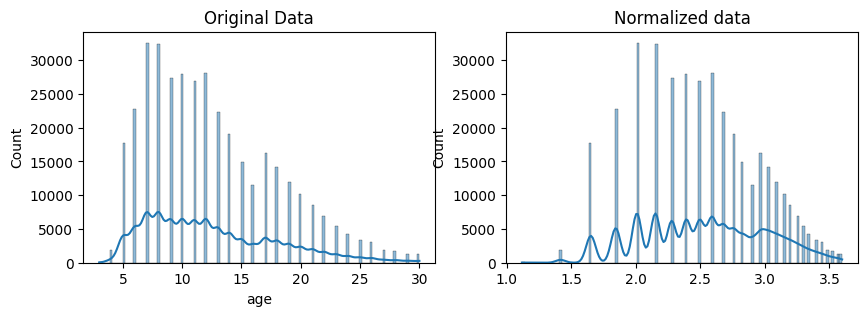

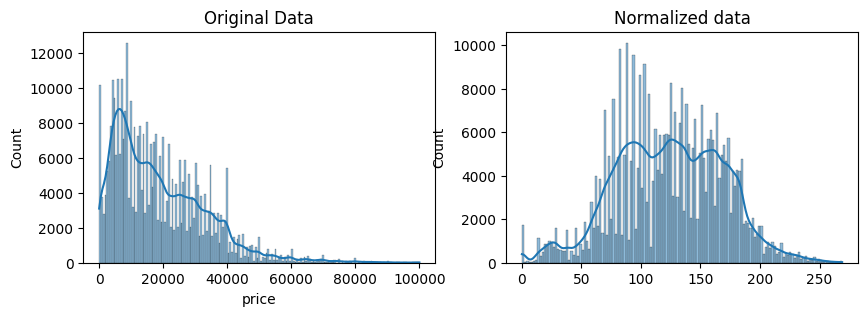

In [123]:
age_place = df4['age']
normalized_age = stats.boxcox(age_place)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(10, 3))
sns.histplot(age_place, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_age[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

price_place = df4['price']
normalized_price = stats.boxcox(price_place)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(10, 3))
sns.histplot(price_place, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_price[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

Normalization for price looks a lot better than for age. Going to try min-max scaler for age.

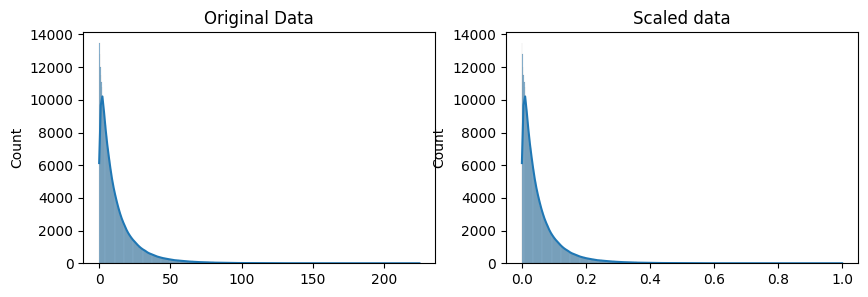

In [136]:
from sklearn.preprocessing import MinMaxScaler

original_age = np.random.exponential(df4['age'])

scaled_age = minmax_scaling(original_age, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.histplot(original_age, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_age, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

I belive I will stop there with all of the data cleaning of this project.

My final dataframe after all this work is: df4

In [142]:
df4

,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,lat,long,posting_date,age,price_per_mile,miles_per_year,clean_title
27,33590,gmc,sierra 1500 crew cab slt,3.0,8,gas,Moderate,other,Unknown,pickup,white,al,32.590000,-85.480000,2021-05-04T12:31:18-0500,11.0,0.579908,5265.727273,1
28,22590,chevrolet,silverado 1500,3.0,8,gas,Moderate,other,Unknown,pickup,blue,al,32.590000,-85.480000,2021-05-04T12:31:08-0500,15.0,0.317146,4748.600000,1
29,39590,chevrolet,silverado 1500 crew,3.0,8,gas,Low,other,Unknown,pickup,red,al,32.590000,-85.480000,2021-05-04T12:31:25-0500,5.0,2.066284,3832.000000,1
30,30990,toyota,tundra double cab sr,3.0,8,gas,Low,other,Unknown,pickup,red,al,32.590000,-85.480000,2021-05-04T10:41:31-0500,8.0,0.753575,5140.500000,1
31,15000,ford,f-150 xlt,4.0,6,gas,High,automatic,rwd,truck,black,al,32.592000,-85.518900,2021-05-03T14:02:03-0500,12.0,0.117188,10666.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,nissan,maxima s sedan 4d,3.0,6,gas,Low,other,fwd,sedan,Unknown,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600,6.0,0.732018,5371.000000,1
426876,30590,volvo,s60 t5 momentum sedan 4d,3.0,NaN,gas,Low,other,fwd,sedan,red,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600,5.0,2.543021,2405.800000,1
426877,34990,cadillac,xt4 sport suv 4d,3.0,NaN,diesel,Low,other,Unknown,hatchback,white,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600,5.0,8.382846,834.800000,1
426878,28990,lexus,es 350 sedan 4d,3.0,6,gas,Low,other,fwd,sedan,silver,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600,7.0,0.962739,4301.714286,1
